In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os

import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re

In [2]:
# Here gonna be settings
path = os.listdir('raw_data')
for x in path:
    print(x)

IMDB Dataset.csv


In [3]:
# Import data
data = pd.read_csv('D:/Learning by doing/Data Science Notebooks/Kaggle/imdb_reviews_challenge/raw_data/IMDB Dataset.csv')

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Investigating data 
print(data.describe())

data.isnull().sum()

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     25000


review       0
sentiment    0
dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

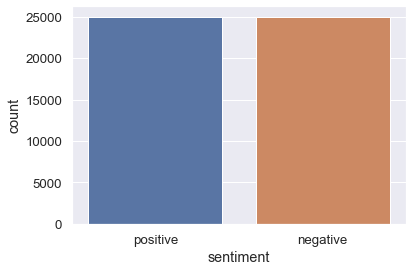

In [5]:
# Balance between neg/pos values --> well balanced
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(x=data.sentiment, data=data)

In [6]:
# Basic data cleaning in reviews
# Remove urls, remove html tags, remove unnecessary symbols, replace sentiment with num values

def get_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Remove square
def text_cleaning(text):
    text = get_html(text)
    text = remove_between_square_brackets(text)
    return text

data['review'] = data['review'].apply(text_cleaning)

data.sentiment.replace('positive', 1, inplace=True)
data.sentiment.replace('negative', 0, inplace=True)

print(data.review[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wou

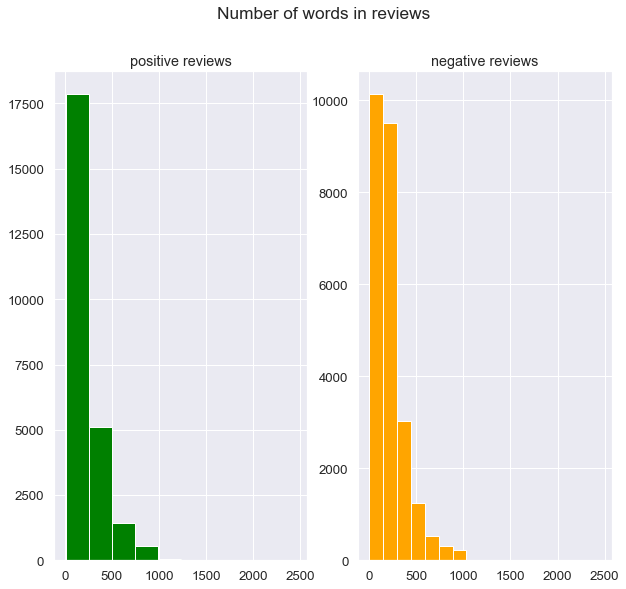

In [7]:
# Length of good and bad reviews (before preprocessing)

positive_reviews = data[data['sentiment']==1]
negative_reviews = data[data['sentiment']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 9), sharex=True)
text_length = positive_reviews['review'].str.split().map(lambda x: len(x))
ax1.hist(text_length, color='green')
ax1.set_title('positive reviews')

text_length = negative_reviews['review'].str.split().map(lambda x: len(x))
ax2.hist(text_length, color='orange')
ax2.set_title('negative reviews')
fig.suptitle('Number of words in reviews')

plt.show()

d:\apps\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\apps\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


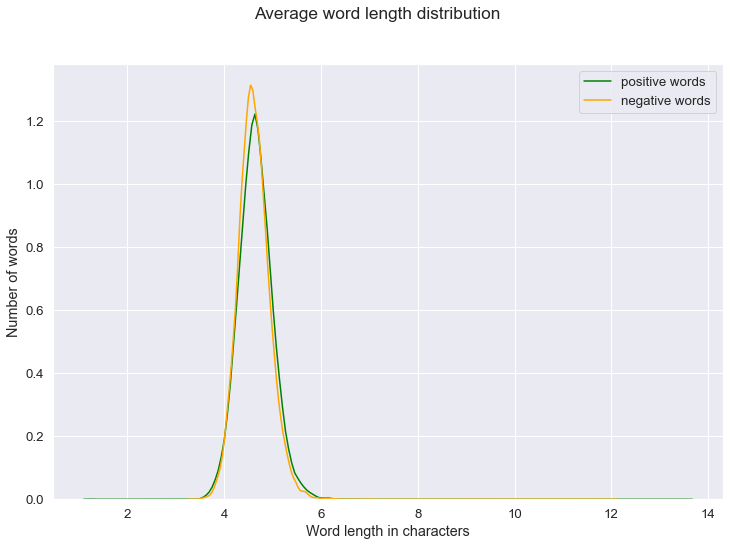

In [8]:
# Most common words + average word length distribution

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Average word length distribution')

words_length = positive_reviews['review'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(words_length.map(lambda x: np.mean(x)),ax=ax, hist=False, color='green', label='positive words')

words_length = negative_reviews['review'].str.split().map(lambda x: [len(i) for i in x])
sns.distplot(words_length.map(lambda x: np.mean(x)),ax=ax, hist=False, color='orange', label='negative words')
ax.set_xlabel('Word length in characters')
ax.set_ylabel('Number of words')

plt.legend()
plt.show()

In [9]:
# Text Preprocessing (remove stopwords, tokenize, lemmatize) with NLTK 

sw = set(stopwords.words('english'))

def remove_stopwords(text):
    pure_text = []
    
    tokenized = word_tokenize(text)
    for i in tokenized:
        if i.lower().strip() not in sw and i.strip().lower().isalpha():
            pure_text.append(i.lower())
    return " ".join(pure_text)

def clean_text(text):
    text = remove_stopwords(text)
    return text
    
data['review'] = data['review'].apply(clean_text)

In [10]:
data.review[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street ski

In [11]:
# Most common words among all reviews

def create_corpus(text):
    tokens = []
    for x in text:
        for s in x.split():
            tokens.append(s)
    return tokens

corpus = create_corpus(data.review)   

corpus[:10]

from collections import Counter
counter = Counter(corpus)
mc = counter.most_common(10)
mc = dict(mc)
mc

{'movie': 85054,
 'film': 76928,
 'one': 51223,
 'like': 39019,
 'good': 28684,
 'would': 26454,
 'even': 24516,
 'time': 23495,
 'really': 22978,
 'see': 22546}

In [12]:
# Data Preparation for TF-IDF in text mining and model building

positive_reviews = data[data['sentiment']==1]
negative_reviews = data[data['sentiment']==0]

train_data = pd.concat([positive_reviews[12500:], negative_reviews[12500:]], ignore_index=True)
print('Train Data', '\n', train_data.sentiment.value_counts())

test_data = pd.concat([positive_reviews[:12500], negative_reviews[:12500]], ignore_index=True)
print('Test Data', '\n', test_data.sentiment.value_counts())

print(test_data.columns)
print(train_data.columns)

Train Data 
 1    12500
0    12500
Name: sentiment, dtype: int64
Test Data 
 1    12500
0    12500
Name: sentiment, dtype: int64
Index(['review', 'sentiment'], dtype='object')
Index(['review', 'sentiment'], dtype='object')


In [16]:
# TF-IDF. Training the Vectorizer on train & test data sets to avoid negative implications 
tfidf = TfidfVectorizer()

def fit_corpus(train_data, test_data):
    corp = pd.concat([train_data, test_data], axis=0, ignore_index=True)
    tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2)) # Creating vectors from corpus (matrix)
    tfidf.fit(corp['review'])
    return tfidf

In [17]:
# Transform dataset to Tf-Idf vectors
# to_dense() converts values to dense arrays

def transformation(tfidf, ds):
    features = tfidf.transform(ds['review'])
    df_transformed = pd.DataFrame(features.to_dense(), columns=tfidf.get_features_names())
    return df_transformed

In [18]:
tfidf = fit_corpus(train_data, test_data)

train_features = transformation(tfidf, train_data)
test_features = transformation(tfidf, test_data)

train_labels = train_data['labels']
test_labels = test_data['labels']

MemoryError: Unable to allocate 58.0 MiB for an array with shape (7605481,) and data type float64